In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ruleset import *

dirty_iris = pd.read_csv('dirty_iris.csv')
dirty_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [4]:
c_observation = len(dirty_iris.dropna())
p_c_observation = ( c_observation / len(dirty_iris) ) * 100

print(f'No. of complete observation = {c_observation}')
print(f'Percentage = {p_c_observation}')

No. of complete observation = 96
Percentage = 64.0


In [5]:
dirty = dirty_iris.replace([np.inf, -np.inf], np.nan)
dirty[dirty.iloc[:,:4] < 0] = np.nan
dirty

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [6]:
rules = {0 : check_species, 1 : check_positive, 2 : compare_petal, 3 : check_sepal, 4 :  compare_sepal_petal}

X = [True] * len(dirty_iris)
c_rule = np.empty(len(rules))
rule = np.array(['rule1', 'rule2', 'rule3', 'rule4', 'rule5'])

for i in rules:
    c_rule[i] = len(rules[i](dirty_iris)) - rules[i](dirty_iris).value_counts().at[True]
    print(f'No. of times rule {i} is broken: ', int(c_rule[i]))
    X = X & rules[i](dirty_iris)

X

No. of times rule 0 is broken:  0
No. of times rule 1 is broken:  57
No. of times rule 2 is broken:  34
No. of times rule 3 is broken:  12
No. of times rule 4 is broken:  30


0       True
1       True
2      False
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

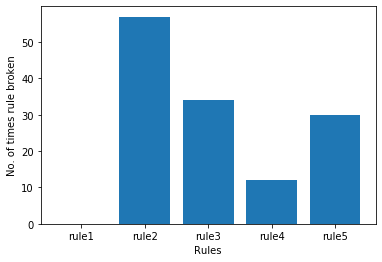

In [7]:
plt.bar(rule, c_rule)
plt.xlabel('Rules')
plt.ylabel('No. of times rule broken')
plt.show()

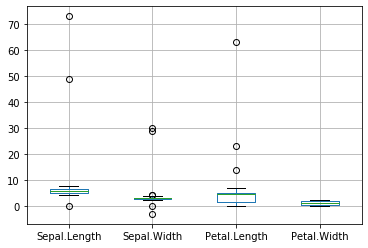

In [8]:
dirty_iris.boxplot()